<a href="https://colab.research.google.com/github/daeunni/Statistical_DL/blob/main/HW/HW6(Attention_overfitting).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HW**
### 1. attetion 모형의 overfitting 해결하기

In [ ]:
import pandas as pd
import numpy as np
import string

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
lines= pd.read_table('/content/drive/MyDrive/Colab Notebooks/DL/[STAT433] 딥러닝을 위한 통계적모델링/data/english to french.txt', names=['eng', 'fr'])

In [ ]:
lines.head(3)

,eng,fr
0,Go.,Va !
1,Run!,Cours !
2,Run!,Courez !


In [ ]:
lines.shape

(149861, 2)

In [ ]:
lines = lines[0:50000]  # 5만 > 10만

# 1. Preprocessing 

In [ ]:
 # 소문자로 만들기 
lines['eng']=lines['eng'].apply(lambda x: x.lower()) 
lines['fr']=lines['fr'].apply(lambda x: x.lower())

In [ ]:
# 문장부호 없애기
exclude = set(string.punctuation)
lines.eng=lines.eng.apply(lambda x: ''.join(ch for ch in x if ch not in exclude))  
lines.fr=lines.fr.apply(lambda x: ''.join(ch for ch in x if ch not in exclude))

In [ ]:
# start와 end를 추가한다!
lines.fr = lines.fr.apply(lambda x : 'start '+ x + ' end')

In [ ]:
lines.head(3)   

,eng,fr
0,go,start va end
1,run,start cours end
2,run,start courez end


In [ ]:
lines.shape

(50000, 2)

## 토큰화

In [ ]:
# fit a tokenizer
from tensorflow.keras.preprocessing.text import Tokenizer
def create_tokenizer(lines):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(lines)
    return tokenizer

In [ ]:
## 영어
import json
eng_tokenizer = create_tokenizer(lines['eng'])
eng_dict=json.loads(json.dumps(eng_tokenizer.word_counts))  

df =pd.DataFrame([eng_dict.keys(), eng_dict.values()]).T
df.columns = ['word','count']
df = df.sort_values(by='count',ascending = False)

df['cum_count']=df['count'].cumsum()  # 단어 등장 빈도
df['cum_perc'] = df['cum_count']/df['cum_count'].max()  # 단어 등장 비율
final_eng_words = df[df['cum_perc']<0.8]['word'].values   # 상위 80퍼센트 등장한 단어만 사용

In [ ]:
final_eng_words   # 80% 빈도수를 차지하는 총 영어 단어의 수 

array(['i', 'you', 'a', 'is', 'the', 'it', 'to', 'he', 'tom', 'im', 'me',
       'do', 'are', 'this', 'that', 'dont', 'was', 'youre', 'we', 'not',
       'my', 'have', 'your', 'did', 'be', 'were', 'all', 'she', 'its',
       'they', 'like', 'can', 'what', 'go', 'of', 'in', 'very', 'want',
       'no', 'how', 'here', 'him', 'on', 'cant', 'ill', 'thats', 'for',
       'know', 'get', 'up', 'need', 'out', 'at', 'just', 'one', 'his',
       'so', 'now', 'why', 'good', 'there', 'please', 'come', 'with',
       'hes', 'think', 'has', 'too', 'will', 'her', 'love', 'see', 'got',
       'look', 'help', 'am', 'really', 'us', 'had', 'who', 'right',
       'take', 'didnt', 'well', 'let', 'where', 'theyre', 'an', 'feel',
       'must', 'home', 'lets', 'stop', 'made', 'happy', 'back', 'about',
       'ive', 'work', 'time', 'still', 'whats', 'give', 'going', 'may',
       'never', 'them', 'tell', 'car', 'leave', 'alone', 'try', 'busy',
       'could', 'say', 'went', 'saw', 'make', 'much', 'isnt', 'sho

In [ ]:
df.head()

,word,count,cum_count,cum_perc
9,i,11307,11307,0.057204
78,you,8787,20094,0.101659
92,a,4899,24993,0.126444
215,is,4468,29461,0.149048
568,the,3808,33269,0.168313


In [ ]:
## 프랑스어
fr_tokenizer = create_tokenizer(lines['fr'])
fr_dict = json.loads(json.dumps(fr_tokenizer.word_counts))

df =pd.DataFrame([fr_dict.keys(), fr_dict.values()]).T
df.columns = ['word','count']
df = df.sort_values(by='count',ascending = False)

df['cum_count']=df['count'].cumsum()   # 단어 등장 빈도
df['cum_perc'] = df['cum_count']/df['cum_count'].max()  # 단어 등장 비율
final_fr_words = df[df['cum_perc']<0.8]['word'].values

In [ ]:
final_fr_words    # 80% 빈도수를 차지하는 총 프랑스 단어의 수 

array(['start', 'end', 'je', 'pas', 'de', 'ne', 'vous', 'il', 'le', 'est',
       'nous', 'la', 'à', 'tom', 'que', 'suis', 'un', 'cest', 'jai', 'tu',
       'a', 'en', 'me', 'ce', 'une', 'les', 'ça', 'elle', 'tout', 'êtes',
       'fait', 'sont', 'te', 'qui', 'mon', 'ma', 'faire', 'très',
       'sommes', 'ils', 'des', 'nest', 'veux', 'es', 'estce', 'votre',
       'du', 'se', 'pour', 'elles', 'y', 'bien', 'cela', 'moi', 'peux',
       'comment', 'été', 'pourquoi', 'êtesvous', 'ici', 'besoin', 'ton',
       'personne', 'où', 'avec', 'dans', 'plus', 'tous', 'vraiment',
       'lui', 'lair', 'être', 'aller', 'si', 'cette', 'train', 'au',
       'toi', 'trop', 'faut', 'nai', 'était', 'ai', 'monde', 'avons',
       'son', 'pense', 'maintenant', 'astu', 'dit', 'ont', 'estu',
       'avezvous', 'va', 'bon', 'cétait', 'puisje', 'toutes', 'sur',
       'jaime', 'as', 'là', 'avez', 'ta', 'sest', 'encore', 'temps',
       'sais', 'jamais', 'lai', 'on', 'fais', 'maison', 'quelle',
       'jétais'

In [ ]:
df.head()

,word,count,cum_count,cum_perc
0,start,50000,50000,0.158865
2,end,50000,100000,0.31773
20,je,9886,109886,0.34914
66,pas,5758,115644,0.367435
75,de,4663,120307,0.382251


In [ ]:
 # 영어, 프랑스어에서 80%차지하는 unique한 단어 개수
print('80% 차지하는 unique한 영어 단어 개수 : ', len(final_eng_words))
print('80% 차지하는 unique한 프랑스 단어 개수 : ', len(final_fr_words)) 

### 80%에 해당하지 않는 단어는 unknown으로 하나의 단어 클래스로 한다. 

80% 차지하는 unique한 영어 단어 개수 :  384
80% 차지하는 unique한 프랑스 단어 개수 :  357


따라서 머신 번역 문제는 385개의 영어 단어를 입력해 358개의 프랑스 단어를 구분하는 문제이다!       
(class가 358개인 다중분류문제, categorical crossentropy)

In [ ]:
# 위 80%에 해당하지 않는 단어는 unknown으로 전환한다!
def filter_eng_words(x):
  t = []
  x = x.split()
  for i in range(len(x)):
    if x[i] in final_eng_words:
      t.append(x[i])
    else:
      t.append('unk')  # unknown 
  x3 = ''
  for i in range(len(t)):
    x3 = x3+t[i]+' '   # 공백을 준다
  return x3

# 프랑스어 함수
def filter_fr_words(x):
  t = []
  x = x.split()
  for i in range(len(x)):
    if x[i] in final_fr_words:
      t.append(x[i])
    else:
      t.append('unk')
  x3 = ''
  for i in range(len(t)):
    x3 = x3+t[i]+' '   # 공백을 준다
  return x3

In [ ]:
filter_eng_words('he is extremely good')   # extremely > unk 변환! 

'he is unk good '

In [ ]:
# unk설정 + 마지막 공백
lines['eng']=lines['eng'].apply(filter_eng_words)
lines['fr']=lines['fr'].apply(filter_fr_words)

In [ ]:
lines.head()

,eng,fr
0,go,start va end
1,run,start unk end
2,run,start unk end
3,unk,start ça unk end
4,unk,start au unk end


In [ ]:
# 유일한 영어와 프랑스어 집합
all_eng_words=set()
for eng in lines.eng:
    for word in eng.split():
        if word not in all_eng_words:
            all_eng_words.add(word)
    
all_french_words=set()
for fr in lines.fr:
    for word in fr.split():
        if word not in all_french_words:
            all_french_words.add(word)

In [ ]:
# 유일한 영어, 프랑스어 집합
input_words = sorted(list(all_eng_words))
target_words = sorted(list(all_french_words))
num_encoder_tokens = len(all_eng_words)
num_decoder_tokens = len(all_french_words)

In [ ]:
print(input_words[10:20])  # 영어
print(target_words[10:20])  # 프랑스어

print(num_encoder_tokens, num_decoder_tokens)

['am', 'an', 'and', 'angry', 'answer', 'any', 'anybody', 'anyone', 'anything', 'are']
['amis', 'arrête', 'arrêtez', 'as', 'assez', 'astu', 'atil', 'au', 'aucun', 'aucune']
385 358


In [ ]:
set(all_french_words) - set(final_fr_words)   # unknown 포함 여부 차이

{'unk'}

In [ ]:
print('unknown 포함 유일한 영어 집합 원소 개수 : ', len(input_words))
print('unknown 포함 유일한 프랑스어 집합 원소 개수 : ', len(target_words))

unknown 포함 유일한 영어 집합 원소 개수 :  385
unknown 포함 유일한 프랑스어 집합 원소 개수 :  358


In [ ]:
# 인덱스와 단어를 딕셔너리로 매핑
input_token_index = dict(
    [(word, i+1) for i, word in enumerate(input_words)])
target_token_index = dict(
    [(word, i+1) for i, word in enumerate(target_words)])

In [ ]:
input_token_index

{'a': 1,
 'about': 2,
 'afraid': 3,
 'again': 4,
 'agree': 5,
 'all': 6,
 'almost': 7,
 'alone': 8,
 'already': 9,
 'always': 10,
 'am': 11,
 'an': 12,
 'and': 13,
 'angry': 14,
 'answer': 15,
 'any': 16,
 'anybody': 17,
 'anyone': 18,
 'anything': 19,
 'are': 20,
 'arent': 21,
 'as': 22,
 'ask': 23,
 'asked': 24,
 'at': 25,
 'away': 26,
 'back': 27,
 'bad': 28,
 'be': 29,
 'beautiful': 30,
 'bed': 31,
 'been': 32,
 'being': 33,
 'believe': 34,
 'best': 35,
 'better': 36,
 'bicycle': 37,
 'big': 38,
 'bit': 39,
 'book': 40,
 'books': 41,
 'both': 42,
 'bought': 43,
 'boy': 44,
 'bring': 45,
 'broke': 46,
 'busy': 47,
 'buy': 48,
 'by': 49,
 'call': 50,
 'called': 51,
 'came': 52,
 'can': 53,
 'cant': 54,
 'car': 55,
 'care': 56,
 'careful': 57,
 'cat': 58,
 'caught': 59,
 'close': 60,
 'coffee': 61,
 'cold': 62,
 'come': 63,
 'coming': 64,
 'could': 65,
 'crazy': 66,
 'day': 67,
 'dead': 68,
 'did': 69,
 'didnt': 70,
 'die': 71,
 'died': 72,
 'do': 73,
 'does': 74,
 'doesnt': 75,
 'dog

In [ ]:
print(input_token_index['unk'])
print(target_token_index['start'])
print(target_token_index['end'])
print(list(input_token_index.keys())[335])   # unknown은 336번으로 매핑

336
284
89
unk


In [ ]:
# RNN 시간스텝 정의를 위한 가장 긴 문장 찾기

length_list=[]   # 영어
for l in lines.eng:
    length_list.append(len(l.split(' ')))
eng_max_length = np.max(length_list)

length_list=[]   # 프랑스어
for l in lines.fr:
    length_list.append(len(l.split(' ')))
fr_max_length = np.max(length_list)

In [ ]:
print(eng_max_length)   # 영어는 8개의 단어가 가장 긴 문장
print(fr_max_length)    # 프랑스어는 17개의 단어가 가장 긴 문장

8
17


In [ ]:
# Time step 기반 RNN Input data 생성(우선 zero로 shape만 맞춰서 생성함)
encoder_input_data = np.zeros(
    (len(lines['eng']), eng_max_length),
    dtype='float32')

decoder_input_data = np.zeros(
    (len(lines['fr']), fr_max_length),
    dtype='float32')

decoder_target_data = np.zeros(
    (len(lines['fr']), fr_max_length, num_decoder_tokens+1),
    dtype='float32')

In [ ]:
# 시간스텝(단어 수)와 5만개의 문장 수
print(encoder_input_data.shape)
print(decoder_input_data.shape)
print(decoder_target_data.shape)   # 디코더는 358 + 1로 지정(index=0은 그냥 빈 공간으로 정의)
# (표본, 시간스텝, 359개의 단어 원핫 벡터)

(50000, 8)
(50000, 17)
(50000, 17, 359)


- Encoder_input_data : 영어 문장 저장
- Decoder_input_data : 영어 문장에 대응되는 프랑스어 문장
- Decoder_target_data : Decoder_input_data보다 한 시점 앞서게 해서 번역을 예측문제로 전환

> 현재 영어 단어와 프랑스어 단어로 다음에 오는 프랑스어 단어를 예측하는 문제가 된다. 

In [ ]:
encoder_input_data[3]

array([0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
# 데이터 직접 생성
for i, (input_text, target_text) in enumerate(zip(lines['eng'], lines['fr'])):

    for t, word in enumerate(input_text.split()):
        encoder_input_data[i, t] = input_token_index[word]

    for t, word in enumerate(target_text.split()):
        decoder_input_data[i, t] = target_token_index[word]

        if t>0:
            decoder_target_data[i, t - 1, target_token_index[word]] = 1.

            if t== len(target_text.split())-1:
                decoder_target_data[i, t:, 89] = 1   # 0은 모두 89로 대체함 

In [ ]:
print(decoder_input_data.shape, encoder_input_data.shape, decoder_target_data.shape)

(50000, 17) (50000, 8) (50000, 17, 359)


In [ ]:
decoder_input_data   # 0은 모두 end를 의미하는 89로 채움! 

array([[284., 321.,  89., ...,   0.,   0.,   0.],
       [284., 320.,  89., ...,   0.,   0.,   0.],
       [284., 320.,  89., ...,   0.,   0.,   0.],
       ...,
       [284., 127., 320., ...,   0.,   0.,   0.],
       [284., 127., 320., ...,   0.,   0.,   0.],
       [284.,  86., 320., ...,   0.,   0.,   0.]], dtype=float32)

In [ ]:
encoder_input_data

array([[120.,   0.,   0., ...,   0.,   0.,   0.],
       [264.,   0.,   0., ...,   0.,   0.,   0.],
       [264.,   0.,   0., ...,   0.,   0.,   0.],
       ...,
       [312., 120., 320., ..., 336.,   0.,   0.],
       [312., 124., 162., ...,   0.,   0.,   0.],
       [312., 124., 162., ...,   0.,   0.,   0.]], dtype=float32)

In [ ]:
for i in range(decoder_input_data.shape[0]):
    for j in range(decoder_input_data.shape[1]):
        if(decoder_input_data[i][j]==0):
            decoder_input_data[i][j] = 89




# 2. Attention
- encoder output과 decoder 출력값의 유사성인 attention을 계산해 인코더에 가중치를 부여한다. 

In [ ]:
# 원래..
from tensorflow.keras.models import Model
from tensorflow.keras.layers import dot
from tensorflow.keras.layers import Input, LSTM, Dense, Embedding, Dropout, Activation, concatenate
import tensorflow as tf
# dropout 0.1 > 0.5


################################ 인코더 #################################
encoder_inputs = Input(shape=(eng_max_length,))
en_x=  Embedding(num_encoder_tokens+1, 256)(encoder_inputs)  # 임베딩차원 늘림 
en_x = Dropout(0.1)(en_x)   # dropout 추가
encoder_outputs, state_h, state_c = LSTM(256, return_sequences=True, return_state=True)(en_x)
encoder_states=[state_h, state_c]   

################################ 디코더 #################################
decoder_inputs = Input(shape=(fr_max_length,))
dex=  Embedding(num_decoder_tokens+1,256)(decoder_inputs)
decoder = Dropout(0.1)(dex)
decoder = LSTM(256, return_sequences=True)(decoder, initial_state=encoder_states)   # 인코더 state와 연결!!


################################ Attention Layer #################################
t = Dense(1500, activation='tanh')(encoder_outputs)
t1 = Dense(1500, activation='tanh')(decoder)

# dot product attention (유사도를 구하는 방법)
# attention 가중치를 value에 반영 (어텐션 score 계산) 
# > 인코더의 모든 은닉상태 각각이 디코더의 현 시점 은닉상태 St와 얼마나 유사한지를 score로 나타냄
attention = dot([t1, t], axes=[2, 2])    # attention 가중치 계산 (Query와 Key의 유사도를 구함)

attention = Dense(eng_max_length, activation='tanh')(attention)  
attention = Activation('softmax')(attention)  # 가중치를 softmax 확률 값을 통해 인코더 output(value)에 전달!

context = dot([attention, encoder_outputs], axes = [2,1])  # 어텐션 value(가중합, product, weighted sum)

decoder_combined_context = concatenate([context, decoder])   # attention value와 디코더의 현재 은닉상태를 concat하여 하나의 벡터로 만듦 
decoder_combined_context = Dense(1000, activation='tanh')(decoder_combined_context)
# decoder = Dropout(0.5)()

output = Dense( num_decoder_tokens+1, activation="softmax")(decoder_combined_context)    # 출력층 (단어 확률값으로 출력)

model3 = Model(inputs=[encoder_inputs, decoder_inputs], outputs=[output])


## ,  kernel_regularizer=tf.keras.regularizers.L1(0.01) 안좋음 > train

In [ ]:
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import dot
# from tensorflow.keras.layers import Input, LSTM, Dense, Embedding, Dropout, Activation, concatenate, BatchNormalization, GRU
# import tensorflow as tf
# # dropout 0.1 > 0.5
# # recurrent dropout 안좋음 
# # 임베딩차원 늘림  > 안좋음

# # 노드 수 줄임
# # initializer, batchnormal 추가
# ################################ 인코더 #################################
# encoder_inputs = Input(shape=(eng_max_length,))
# en_x=  Embedding(num_encoder_tokens+1, 128)(encoder_inputs)  
# en_x = Dropout(0.7)(en_x)   # dropout 추가
# encoder_outputs, state_h, state_c = LSTM(128, return_sequences=True, recurrent_dropout = 0.3, return_state=True)(en_x)   
# encoder_states=[state_h, state_c]   

# ################################ 디코더 #################################
# decoder_inputs = Input(shape=(fr_max_length,))
# dex=  Embedding(num_decoder_tokens+1, 128)(decoder_inputs)
# decoder = Dropout(0.7)(dex)
# decoder = LSTM(128, recurrent_dropout = 0.3, return_sequences=True)(decoder, initial_state=encoder_states)   # 인코더 state와 연결!!


# ################################ Attention Layer #################################
# t = Dense(1000, activation='tanh', kernel_initializer='he_normal')(encoder_outputs)
# t1 = Dense(1000, activation='tanh', kernel_initializer='he_normal')(decoder)

# # dot product attention (유사도를 구하는 방법)
# # attention 가중치를 value에 반영 (어텐션 score 계산) 
# # > 인코더의 모든 은닉상태 각각이 디코더의 현 시점 은닉상태 St와 얼마나 유사한지를 score로 나타냄
# attention = dot([t1, t], axes=[2, 2])    # attention 가중치 계산 (Query와 Key의 유사도를 구함)

# # attention = 

# attention = Dense(eng_max_length, activation='tanh', kernel_initializer='he_normal')(attention)  
# attention = BatchNormalization(momentum=0.9)(attention)
# attention = Activation('softmax')(attention)  # 가중치를 softmax 확률 값을 통해 인코더 output(value)에 전달!

# context = dot([attention, encoder_outputs], axes = [2,1])  # 어텐션 value(가중합, product, weighted sum)

# decoder_combined_context = concatenate([context, decoder])   # attention value와 디코더의 현재 은닉상태를 concat하여 하나의 벡터로 만듦 
# decoder_combined_context = Dense(1000, activation='tanh', kernel_initializer='he_normal')(decoder_combined_context)
# # decoder = Dropout(0.5)()

# output = Dense( num_decoder_tokens+1, activation="softmax", kernel_regularizer=tf.keras.regularizers.L1(0.0001))(decoder_combined_context)    # 출력층 (단어 확률값으로 출력)

# model3 = Model(inputs=[encoder_inputs, decoder_inputs], outputs=[output])


# ## ,  kernel_regularizer=tf.keras.regularizers.L1(0.01) 안좋음 > train

In [ ]:
model3.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
input_10 (InputLayer)           [(None, 17)]         0                                            
__________________________________________________________________________________________________
embedding_8 (Embedding)         (None, 8, 256)       98816       input_9[0][0]                    
__________________________________________________________________________________________________
embedding_9 (Embedding)         (None, 17, 256)      91904       input_10[0][0]                   
____________________________________________________________________________________________

In [ ]:
model3.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 17)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 8, 256)       98816       input_1[0][0]                    
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 17, 256)      91904       input_2[0][0]                    
______________________________________________________________________________________________

In [ ]:
model3.compile(optimizer='adam', loss='categorical_crossentropy',metrics = ['accuracy'])

In [ ]:
history3 = model3.fit([encoder_input_data, decoder_input_data], decoder_target_data,
          batch_size=32,
          epochs=5,
          validation_split=0.01)

Epoch 1/5
1547/1547 [==============================] - 25s 14ms/step - loss: 0.9883 - accuracy: 0.8219 - val_loss: 0.6518 - val_accuracy: 0.8367
Epoch 2/5
1547/1547 [==============================] - 20s 13ms/step - loss: 0.4390 - accuracy: 0.8886 - val_loss: 0.5206 - val_accuracy: 0.8644
Epoch 3/5
1547/1547 [==============================] - 20s 13ms/step - loss: 0.3520 - accuracy: 0.9051 - val_loss: 0.4837 - val_accuracy: 0.8706
Epoch 4/5
1547/1547 [==============================] - 20s 13ms/step - loss: 0.3118 - accuracy: 0.9126 - val_loss: 0.4790 - val_accuracy: 0.8699
Epoch 5/5
1547/1547 [==============================] - 20s 13ms/step - loss: 0.2879 - accuracy: 0.9177 - val_loss: 0.4591 - val_accuracy: 0.8794


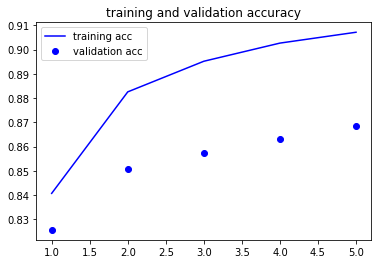

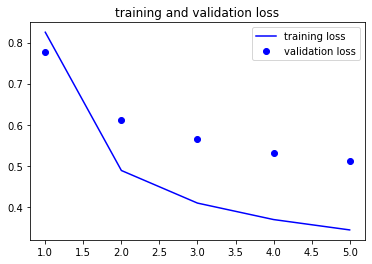

In [ ]:
import matplotlib.pyplot as plt
acc=history3.history['accuracy']
val_acc=history3.history['val_accuracy']
loss=history3.history['loss']
val_loss=history3.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'b',label='training acc')
plt.plot(epochs,val_acc,'bo',label='validation acc')
plt.title('training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'b',label='training loss')
plt.plot(epochs,val_loss,'bo',label='validation loss')
plt.title('training and validation loss')
plt.legend()
plt.show()

In [ ]:
decoder_input_data_pred = np.zeros(
    (len(lines.fr), fr_max_length),
    dtype='float32')

final_pred_att = []
for i in range(2500):
  word = 284
  for j in range(17):
    decoder_input_data_pred[(47500+i), j] = word
    pred = model3.predict([encoder_input_data[(47500+i)].reshape(1,8),decoder_input_data_pred[47500+i].reshape(1,17)])
    t = np.argmax(pred[0][j])
    word = t
    if word==89:
      break
  final_pred_att.append(list(decoder_input_data_pred[47500+i]))

In [ ]:
final_pred2_att = np.array(final_pred_att)
count = 0
correct_count = 0

for i in range(2500):
  correct_count += np.sum((decoder_input_data[47500+i]==final_pred2_att[i]) & (decoder_input_data[47500+i]!=89))
  count += np.sum(decoder_input_data[47500+i]!=89)
correct_count/count  

0.4925907321361296

In [ ]:
k = -2400
t = model3.predict([encoder_input_data[k].reshape(1,encoder_input_data.shape[1]),decoder_input_data[k].reshape(1,decoder_input_data.shape[1])]).reshape(decoder_input_data.shape[1], num_decoder_tokens+1)

for i in range(len(encoder_input_data[k])):
  if int(encoder_input_data[k][i])!=0:
    print(list(input_token_index.keys())[int(encoder_input_data[k][i]-1)])

i
feel
like
unk


In [ ]:
t2 = np.argmax(t,axis=1)
for i in range(len(t2)):
  if int(t2[i])!=0:
    print(list(target_token_index.keys())[int(t2[i]-1)])

je
unk
unk
unk
end
unk
end
end
end
end
end
end
end
end
end
end
end


In [ ]:
t2 = decoder_input_data[k]
for i in range(len(t2)):
  if int(t2[i])!=0:
    print(list(target_token_index.keys())[int(t2[i]-1)])

start
jai
unk
de
faire
la
unk
end
end
end
end
end
end
end
end
end
end
